Optimization terminated successfully.
         Current function value: 0.260417
         Iterations: 493
         Function evaluations: 14850
         Gradient evaluations: 495


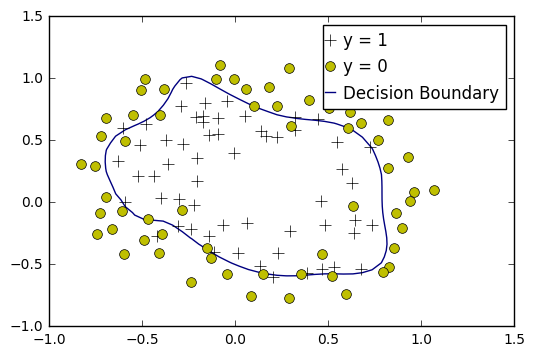

In [1]:
import numpy as np
import pandas as pd
# import seaborn as sns
from scipy.special import expit
from scipy.optimize import fmin_bfgs
import matplotlib.pyplot as plt

data = np.loadtxt('ex2data2.txt', delimiter=",")
X = data[:,:2]
y = data[:,2]


def plotData(X, y):
# Find Indices of Positive and Negative Examples
    pos = np.where(y==1)
    neg = np.where(y==0)
    # plot! [0] indexing at end necessary for proper legend creation in ex2.py
    p1 = plt.plot(X[pos,0], X[pos,1], marker='+', markersize=9, color='k')[0]
    p2 = plt.plot(X[neg,0], X[neg,1], marker='o', markersize=7, color='y')[0]

    return p1, p2

def mapFeature(X1, X2):
    degree = 6
    num_features = int((degree+1) * (degree+2) / 2)
    out = np.ones(( X1.shape[0], num_features ))
    
    curr_column = 1
    for i in np.arange(1, degree + 1):
        for j in np.arange(i+1):
            out[:, curr_column] = np.power(X1, i-j) * np.power(X2, j)
            curr_column += 1
    return out

def sigmoid(z):
    x = expit(z)
    return x

def costFunctionReg(theta, X, y, lambda_reg, return_grad=False):
    # Initialize some useful values
    m = len(y) # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)
    m = len(y)
    one = y * np.transpose(np.log( sigmoid( np.dot(X,theta) ) ))
    two = (1-y) * np.transpose(np.log( 1 - sigmoid( np.dot(X,theta) ) ))
    reg = ( float(lambda_reg) / (2*m)) * np.power(theta,2).sum()
    J = -(1./m)*(one+two).sum() + reg

    # applies to j = 1,2,...,n - NOT to j = 0
    grad = (1./m) * np.dot(sigmoid( np.dot(X,theta) ).T - y, X).T + ( float(lambda_reg) / m )*theta

    # the case of j = 0 (recall that grad is a n+1 vector)
    # since we already have the whole vectorized version, we use that
    grad_no_regularization = (1./m) * np.dot(sigmoid( np.dot(X,theta) ).T - y, X).T

    # and then assign only the first element of grad_no_regularization to grad
    grad[0] = grad_no_regularization[0]

    if return_grad == True:
        return J, grad.flatten()
    elif return_grad == False:
        return J 
    
def plotDecisionBoundary(theta, X, y):
    fig = plt.figure()

    p1, p2 = plotData(X[:,1:3], y)

    plt.hold(True)

    # Here is the grid range
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    
    z = np.zeros(( len(u), len(v) ))
    # Evaluate z = theta*x over the grid
    for i in np.arange(len(u)):
        for j in np.arange(len(v)):
            z[i,j] = np.dot(mapFeature(np.array([u[i]]), np.array([v[j]])),theta)
    z = np.transpose(z) # important to transpose z before calling contour

    # Plot z = 0
    # Notice you need to specify the level 0
    # we get collections[0] so that we can display a legend properly
    p3 = plt.contour(u, v, z, levels=[0], linewidth=2).collections[0]

    # Legend, specific for the exercise
    plt.legend((p1,p2, p3),('y = 1', 'y = 0', 'Decision Boundary'), numpoints=1, handlelength=0)

    plt.show()

X = mapFeature(X[:, 0], X[:, 1])

m,n = X.shape

# Initialize fitting parameters
initial_theta = np.zeros((n, 1))

# Set regularization parameter lambda to 1
lambda_reg = 0.000001

cost = costFunctionReg(initial_theta, X, y, lambda_reg)

#  Run fmin_bfgs to obtain the optimal theta
#  This function returns theta and the cost 
myargs=(X, y, lambda_reg)
theta = fmin_bfgs(costFunctionReg, x0=initial_theta, args=myargs)

# Plot Boundary
plotDecisionBoundary(theta, X, y)

# # Labels, title and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('lambda = {:f}'.format(lambda_reg))
